In [227]:
import pandas as ps
import matplotlib.pyplot as mt
import seaborn as sb
import numpy as np
import plotly.graph_objects as gg


In [228]:
atp = ps.read_csv('atp_matches_2023.csv')
atp['tourney_date'] = ps.to_datetime(atp['tourney_date'] , format='%Y%m%d')
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,2023-01-02,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,2023-01-02,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,2023-01-02,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,2023-01-02,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,2023-01-02,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4,D,2023-02-04,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0


In [229]:
qwe = atp.isnull().sum() 
qwe
# columns with total number of null values data points in it 

tourney_id               0
tourney_name             0
surface                 53
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1736
winner_entry          2513
winner_name              0
winner_hand              0
winner_ht              204
winner_ioc               0
winner_age               1
loser_id                 0
loser_seed            2217
loser_entry           2291
loser_name               0
loser_hand               0
loser_ht               336
loser_ioc                0
loser_age                7
score                    0
best_of                  0
round                    0
minutes                232
w_ace                  171
w_df                   171
w_svpt                 171
w_1stIn                171
w_1stWon               171
w_2ndWon               171
w_SvGms                171
w_bpSaved              171
w_bpFaced              171
l_ace                  171
l

### Creating a primary key called match_id using tourney_id and match_num to uniquely identify each match stats


In [230]:
atp['match_id'] = atp['tourney_id'].astype(str).str.cat(atp['match_num'].astype(str), sep = '')
atp['match_id']

0                            2023-9900300
1                            2023-9900299
2                            2023-9900296
3                            2023-9900295
4                            2023-9900292
                      ...                
2981    2023-M-DC-2023-WG2-PO-RSA-LUX-015
2982    2023-M-DC-2023-WG2-PO-TUN-CYP-011
2983    2023-M-DC-2023-WG2-PO-TUN-CYP-012
2984    2023-M-DC-2023-WG2-PO-TUN-CYP-014
2985    2023-M-DC-2023-WG2-PO-TUN-CYP-015
Name: match_id, Length: 2986, dtype: object

### splitting match details columns 
#### we create a new datagframe to do the splitting to preserve the original dataframe, the new primary key match_id will be used to rejoin it with the original dataframe

In [231]:

scrcs = atp[['score', 'match_id','winner_name']]

scrcs[['set1' ,'set2' , 'set3' , 'set4' , 'set5']] = scrcs['score'].str.split(' ', expand = True)
scrcs.drop('score' , axis='columns', inplace=True)
## repakce it with sets
scrcs

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\2397344397.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\2397344397.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\2397344397.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,match_id,winner_name,set1,set2,set3,set4,set5
0,2023-9900300,Taylor Fritz,7-6(4),7-6(6),None,None,None
1,2023-9900299,Frances Tiafoe,6-2,0-0,RET,None,None
2,2023-9900296,Taylor Fritz,7-6(5),7-6(5),None,None,None
3,2023-9900295,Frances Tiafoe,6-3,6-3,None,None,None
4,2023-9900292,Stefanos Tsitsipas,4-6,7-6(2),6-4,None,None
...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-015,Raphael Calzi,6-4,7-5,None,None,None
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-011,Petros Chrysochos,6-4,7-6(4),None,None,None
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-012,Moez Echargui,6-1,3-6,6-2,None,None
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-014,Menelaos Efstathiou,3-6,6-1,6-4,None,None


#### convert those rows of column set1 which does have '-' in them into  0-0 , representing no scores 


In [232]:
cols = ['set1' , 'set2', 'set3','set4','set5']

for column in scrcs[['set1','set2', 'set3','set4','set5']]:
    scrcs.loc[scrcs[column].str.contains('-') == False , column] = '0-0'
    scrcs[column].fillna(value = '0-0', inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\732855629.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\732855629.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
#functions to create columns that contain respective set point difference 
def set1_pnt_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set1'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff1 = float_scores[0] - float_scores[1]
        scrcs.loc[[i],'set1_pnt_diff'] = diff1
    
def set2_pnt_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set2'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff2 = float_scores[0] - float_scores[1]
        scrcs.loc[[i],'set2_pnt_diff'] = diff2


def set3_pnt_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set3'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').replace('[',' ').replace(']','').split()
        float_scores = [float(string) for string in scores]
        diff3 = float_scores[0] - float_scores[1]
        scrcs.loc[[i],'set3_pnt_diff'] = diff3

def set4_pnt_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set4'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff4 = float_scores[0] - float_scores[1]
        scrcs.loc[[i],'set4_pnt_diff'] = diff4
        
def set5_pnt_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set5'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff5 = float_scores[0] - float_scores[1]
        scrcs.loc[[i],'set5_pnt_diff'] = diff5

In [234]:
#functions to create columns that contain respective set point difference 
def set1_pnt_diffL(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set1'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff1 = - float_scores[0] + float_scores[1]
        scrcs.loc[[i],'set1_pnt_diff'] = diff1
    
def set2_pnt_diffL(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set2'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff2 = - float_scores[0] + float_scores[1]
        scrcs.loc[[i],'set2_pnt_diff'] = diff2


def set3_pnt_diffL(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set3'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').replace('[',' ').replace(']','').split()
        float_scores = [float(string) for string in scores]
        diff3 = - float_scores[0] + float_scores[1]
        scrcs.loc[[i],'set3_pnt_diff'] = diff3

def set4_pnt_diffL(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set4'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff4 = - float_scores[0] + float_scores[1]
        scrcs.loc[[i],'set4_pnt_diff'] = diff4
        
def set5_pnt_diffL(scrcs):
    for i in range(scrcs.shape[0]):
        scores = scrcs['set5'][i]
        scores = scores.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores = [float(string) for string in scores]
        diff5 = - float_scores[0] + float_scores[1]
        scrcs.loc[[i],'set5_pnt_diff'] = diff5

In [235]:
set1_pnt_diff(scrcs)
set2_pnt_diff(scrcs)
set3_pnt_diff(scrcs)
set4_pnt_diff(scrcs)
set5_pnt_diff(scrcs)

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\273915930.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\273915930.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\273915930.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\273915930.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [236]:
scrcs

,match_id,winner_name,set1,set2,set3,set4,set5,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set4_pnt_diff,set5_pnt_diff
0,2023-9900300,Taylor Fritz,7-6(4),7-6(6),0-0,0-0,0-0,1.0,1.0,0.0,0.0,0.0
1,2023-9900299,Frances Tiafoe,6-2,0-0,0-0,0-0,0-0,4.0,0.0,0.0,0.0,0.0
2,2023-9900296,Taylor Fritz,7-6(5),7-6(5),0-0,0-0,0-0,1.0,1.0,0.0,0.0,0.0
3,2023-9900295,Frances Tiafoe,6-3,6-3,0-0,0-0,0-0,3.0,3.0,0.0,0.0,0.0
4,2023-9900292,Stefanos Tsitsipas,4-6,7-6(2),6-4,0-0,0-0,-2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-015,Raphael Calzi,6-4,7-5,0-0,0-0,0-0,2.0,2.0,0.0,0.0,0.0
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-011,Petros Chrysochos,6-4,7-6(4),0-0,0-0,0-0,2.0,1.0,0.0,0.0,0.0
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-012,Moez Echargui,6-1,3-6,6-2,0-0,0-0,5.0,-3.0,4.0,0.0,0.0
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-014,Menelaos Efstathiou,3-6,6-1,6-4,0-0,0-0,-3.0,5.0,2.0,0.0,0.0


In [237]:
clean_atp_rows = atp.dropna(axis = 1)
clean_atp_rows.count()

tourney_id       2986
tourney_name     2986
draw_size        2986
tourney_level    2986
tourney_date     2986
match_num        2986
winner_id        2986
winner_name      2986
winner_hand      2986
winner_ioc       2986
loser_id         2986
loser_name       2986
loser_hand       2986
loser_ioc        2986
score            2986
best_of          2986
round            2986
match_id         2986
dtype: int64

In [238]:
tounrys = ps.DataFrame(atp['tourney_name'].value_counts())
tounrys.reset_index(inplace  = True)
tounrys.rename({'index' : 'tourney_name' , 'tourney_name' : 'counts'}, axis=1 , inplace= True)
top_tourney = tounrys[tounrys.counts > 50]
top_tourney

,tourney_name,counts
0,Roland Garros,127
1,Australian Open,127
2,Wimbledon,127
3,Us Open,127
4,Madrid Masters,95
5,Rome Masters,95
6,Miami Masters,95
7,Indian Wells Masters,95
8,Shanghai Masters,95
9,Cincinnati Masters,55


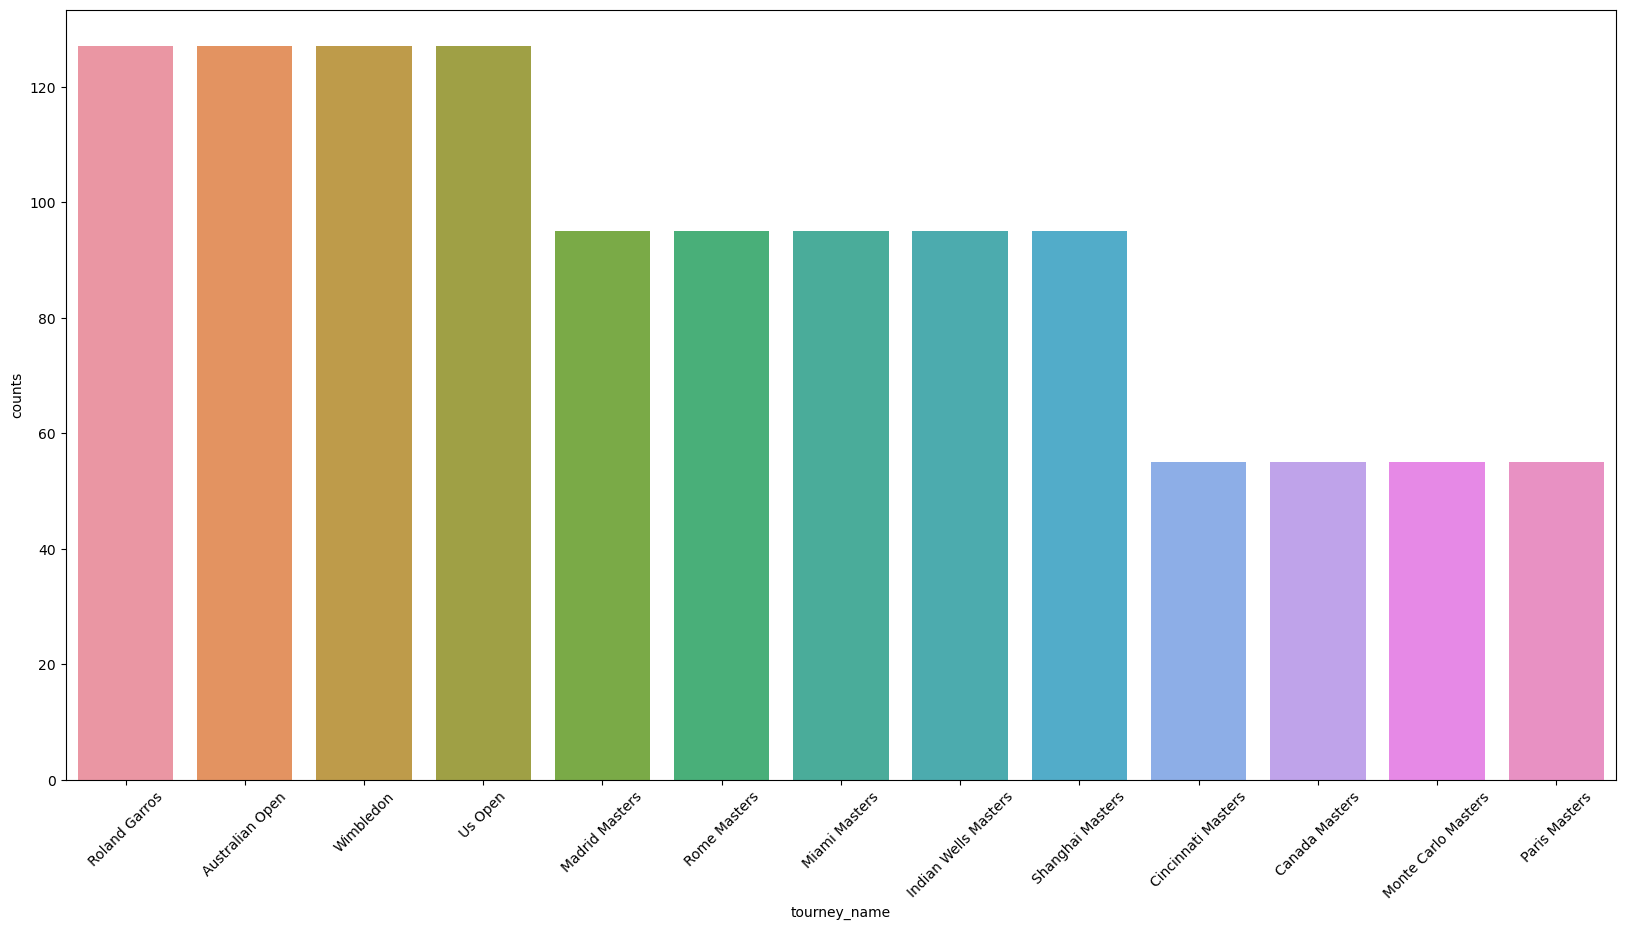

In [239]:
mt.figure( figsize=(20, 10))
sb.barplot(data  = top_tourney , x = 'tourney_name' , y = 'counts' )
mt.xticks(rotation = 45)
mt.show()

In [240]:
df = atp[['winner_hand' , 'tourney_level' , 'surface' , 'winner_age' , 'loser_age' , 'winner_rank' , 'loser_rank' , 'loser_hand']]
df['surface'].value_counts()

Hard     1704
Clay      901
Grass     328
Name: surface, dtype: int64

In [241]:
surf = df[['surface' , 'winner_hand' , 'loser_hand' , 'winner_age' , 'loser_age']]
surf = surf[((surf['winner_hand'] == 'R') & (surf['loser_hand']== 'L')) | ((surf['winner_hand'] == 'L') & (surf['loser_hand']== 'R'))]
surf['surface'].fillna('ND' , inplace= True)


In [242]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = atp.select_dtypes(include=numerics)
numerical_df

,draw_size,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,18,300,126203,3.0,193.0,25.1,126610,5.0,196.0,26.7,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,18,299,126207,NaN,188.0,24.9,207518,NaN,185.0,20.8,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,18,296,126203,3.0,193.0,25.1,128034,2.0,196.0,25.8,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,18,295,126207,NaN,188.0,24.9,200390,NaN,183.0,23.9,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,18,292,126774,1.0,193.0,24.3,126610,5.0,196.0,26.7,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,4,5,202335,NaN,NaN,25.5,209280,NaN,NaN,18.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0
2982,4,1,117365,NaN,185.0,26.8,109734,NaN,NaN,27.5,...,NaN,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0
2983,4,2,121411,NaN,180.0,30.0,144949,NaN,NaN,23.9,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0
2984,4,4,144949,NaN,NaN,23.9,144826,NaN,188.0,25.8,...,NaN,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0


In [243]:
age_vs_surface_stats = surf.groupby(['surface' , 'winner_hand']).agg( 
    med_win_age = ('winner_age' , np.median), med_L_age =  ('loser_age'  , (np.median)))
age_vs_surface_stats.reset_index(inplace=True)
age_vs_surface_stats

# for age metric median is a batter indicator of the players age

,surface,winner_hand,med_win_age,med_L_age
0,Clay,L,27.4,27.1
1,Clay,R,26.5,26.8
2,Grass,L,28.0,26.6
3,Grass,R,27.0,27.3
4,Hard,L,25.3,26.6
5,Hard,R,26.0,26.7
6,ND,L,23.0,23.3
7,ND,R,22.5,25.3


In [244]:
#winner_entry column has null values which actually represent that these players have normal entry into the tournament
atp['winner_entry'].fillna('normal_entry' , inplace =  True)

In [245]:
#Average age of players in each tourney level
atp.fillna('ND' , inplace=True)
atp = atp[(atp['winner_age'] != 'ND') & (atp['minutes'] != 'ND') & (atp['winner_ht'] != 'ND') & (atp['winner_rank'] != 'ND')]
we = ps.to_numeric(atp['minutes'])

In [246]:
winner_count = atp.groupby('winner_ht').agg(count = ('winner_ht', np.size))
winner_count.reset_index(inplace= True)
winner_count

,winner_ht,count
0,170.0,64
1,172.0,2
2,173.0,6
3,175.0,25
4,178.0,80
5,180.0,109
6,183.0,434
7,185.0,534
8,188.0,524
9,190.0,17


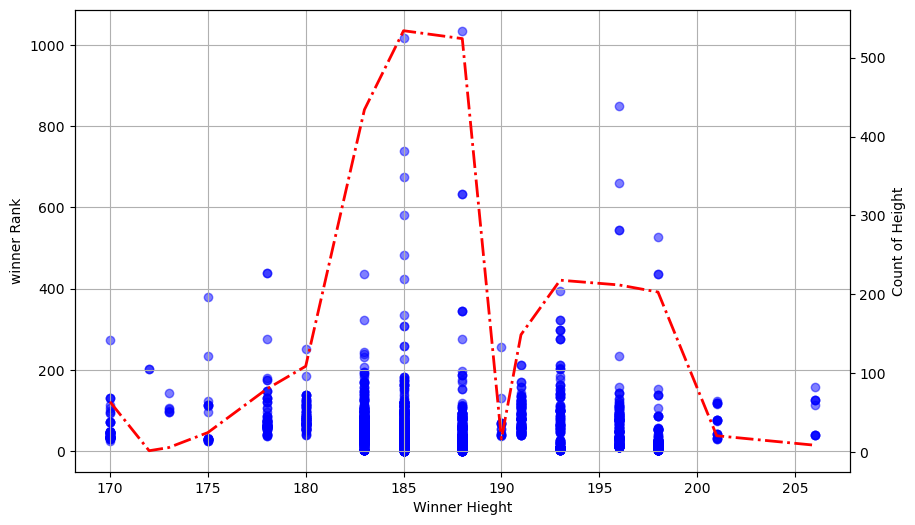

In [247]:
fg ,ax1 = mt.subplots(figsize= (10,6))
ax1.scatter(   x = atp['winner_ht'] , y = atp['winner_rank']  , c = 'blue' , alpha= .5)
ax1.set_xlabel('Winner Hieght')
ax1.set_ylabel('winner Rank')
ax3 = ax1.twinx()
ax3.plot(winner_count['winner_ht'] ,  winner_count['count'] ,  color = 'red' , linewidth = 2 , linestyle = '-.')
ax3.set_ylabel('Count of Height')
ax1.grid(True)
mt.show()

In [248]:
minutes = atp['minutes']
atp = atp[(atp['winner_age'] != 'ND') & (atp['winner_ht'] != 'ND') & (atp['minutes'] != 'ND')]
atp['minutes'] = minutes

In [249]:
atp['minutes'] = ps.to_numeric(atp['minutes']) * 3

([<matplotlib.axis.XTick at 0x1f436bdd990>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50')])

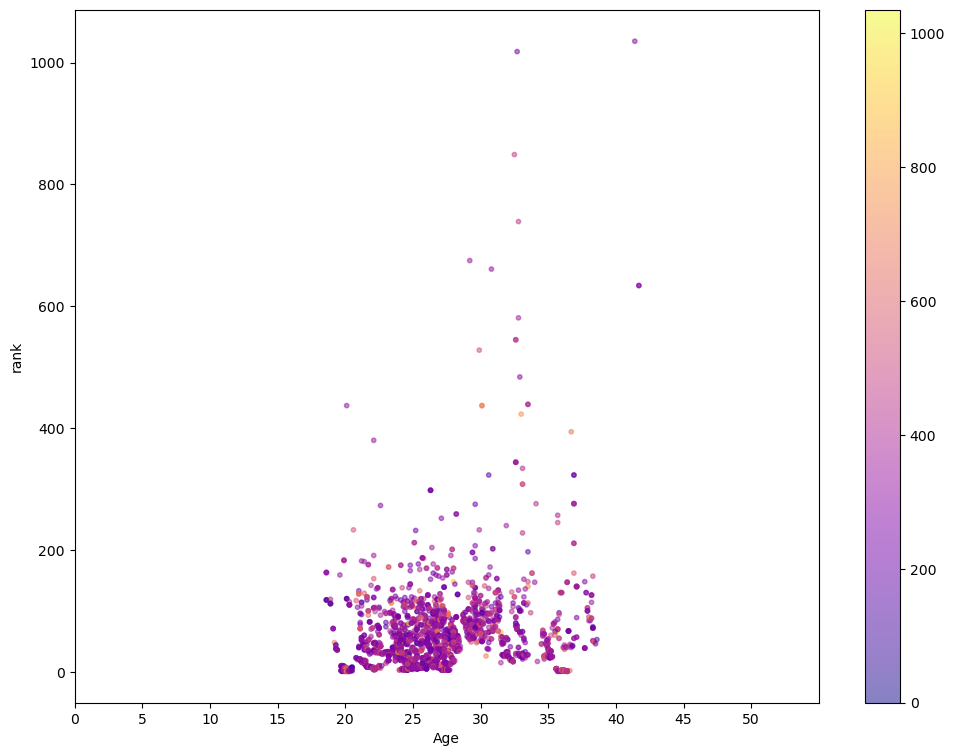

In [250]:
mt.figure(figsize=(12, 9))
mt.scatter(x=atp['winner_age'],  y= atp['winner_rank'], c=atp['minutes'] , alpha=0.5 , cmap= 'plasma', s = 10)
mt.colorbar()
mt.xlim(0 , 55)
mt.xlabel('Age')
mt.ylabel('rank')
mt.xticks(np.arange(0, 55 ,  step = 5))

# Age vs Rank Coreelation

In [251]:
from numpy import size
import plotly.express as pt


scat = pt.scatter(x =atp['winner_age'], y= atp['winner_rank'], color=atp['minutes'] , labels={'x':'Age','y':'Rank'}, title = 'Age vs Rank correlation')
scat.show()

In [252]:
winner_det = atp[['winner_entry' , 'winner_age' ]].sort_values('winner_entry')
winner_det.drop(winner_det[winner_det['winner_age'] == 'ND'].index , inplace  = True)

In [253]:
wd1 = winner_det.groupby('winner_entry').agg(median_winner_age = ('winner_age' , np.median), count_of_winner = ('winner_age' , np.size)).reset_index()
wd1

,winner_entry,median_winner_age,count_of_winner
0,Alt,21.70,3
1,LL,26.80,39
2,PR,36.90,25
3,Q,27.00,204
4,SE,27.30,8
5,WC,28.25,110
6,normal_entry,26.20,2218


# median age of players on every winner entry type 

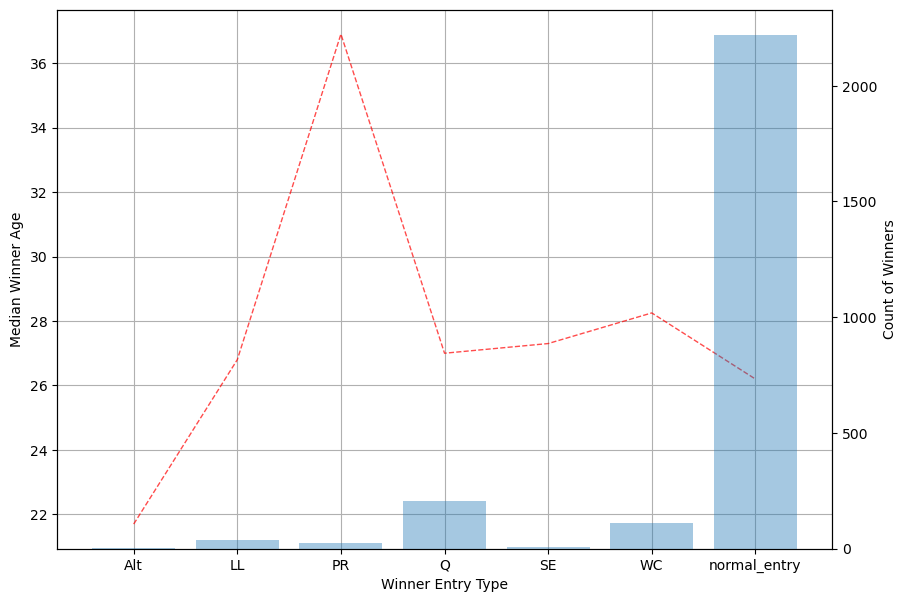

In [254]:
fig , ax =  mt.subplots(figsize = (10,7))
ax.plot( wd1['winner_entry'] , wd1['median_winner_age'] , color = 'red' , alpha = .7 , linewidth = 1 , linestyle= '--' )
ax.set_xlabel('Winner Entry Type')
ax.set_ylabel('Median Winner Age')
ax2 = ax.twinx()
ax2.bar( wd1['winner_entry'] , wd1['count_of_winner']  , alpha = .4)
ax2.set_ylabel('Count of Winners')
ax.grid(True)
mt.show()

In [255]:
aces_ratios = atp[['winner_name' , 'surface' , 'w_ace' , 'w_1stWon' , 'w_2ndWon']]
aces_ratios = aces_ratios.replace('ND' ,0)

In [256]:
aces_ratios

,winner_name,surface,w_ace,w_1stWon,w_2ndWon
0,Taylor Fritz,Hard,15.0,45.0,16.0
1,Frances Tiafoe,Hard,3.0,15.0,3.0
2,Taylor Fritz,Hard,11.0,44.0,19.0
3,Frances Tiafoe,Hard,5.0,31.0,11.0
4,Stefanos Tsitsipas,Hard,9.0,43.0,28.0
...,...,...,...,...,...
2758,Dominic Stricker,Hard,3.0,22.0,10.0
2759,Luca Nardi,Hard,5.0,51.0,14.0
2761,Hamad Medjedovic,Hard,13.0,35.0,15.0
2763,Hamad Medjedovic,Hard,14.0,54.0,16.0


In [257]:
ace_info_df = aces_ratios.groupby(['winner_name' , 'surface']).agg(t_ace = ('w_ace' , np.average), t_1stsrv = ('w_1stWon' , np.average),t_2stsrv = ('w_2ndWon' , np.average)).sort_values('t_ace', ascending= False).head(30).reset_index()
ace_info_df

,winner_name,surface,t_ace,t_1stsrv,t_2stsrv
0,Milos Raonic,Grass,28.000000,77.000000,20.000000
1,Milos Raonic,Hard,26.000000,43.500000,22.000000
2,Jiri Vesely,Grass,23.000000,75.000000,25.000000
3,Oscar Otte,Grass,21.000000,58.000000,18.000000
4,John Isner,Hard,20.666667,44.000000,14.333333
5,Lloyd Harris,Hard,20.000000,50.750000,18.500000
6,Yosuke Watanuki,Grass,19.500000,69.000000,25.000000
7,Quentin Halys,Grass,18.500000,47.500000,27.500000
8,Hubert Hurkacz,Clay,18.200000,59.800000,28.800000
9,Hubert Hurkacz,Grass,18.000000,48.833333,17.333333


In [258]:
# second serve lost vs second serve won
#1st serve points won not by ace  vs 
#1st serve + second serve = t_srve 
#first serve - ace = serve points not won on 

In [259]:
ace_info_df = aces_ratios.groupby(['winner_name' , 'surface']).agg(t_ace = ('w_ace' , np.average), t_1stsrv = ('w_1stWon' , np.average),t_2stsrv = ('w_2ndWon' , np.average)).sort_values('t_ace', ascending= False).head(30).reset_index()


In [260]:
player_card = atp[['winner_name','loser_name']]
player_card

,winner_name,loser_name
0,Taylor Fritz,Matteo Berrettini
1,Frances Tiafoe,Lorenzo Musetti
2,Taylor Fritz,Hubert Hurkacz
3,Frances Tiafoe,Kacper Zuk
4,Stefanos Tsitsipas,Matteo Berrettini
...,...,...
2758,Dominic Stricker,Luca Nardi
2759,Luca Nardi,Flavio Cobolli
2761,Hamad Medjedovic,Luca Van Assche
2763,Hamad Medjedovic,Alex Michelsen


In [261]:
player_wins = player_card.groupby(['winner_name']).agg(wins = ('winner_name' , np.size)).reset_index()
player_loses = player_card.groupby(['loser_name']).agg(loses = ('loser_name' , np.size)).reset_index()


# creating player win record by using ratio factor and selecting top 30

In [262]:
player_win_ratios = ps.merge(player_loses, player_wins , left_on='loser_name'  , right_on  = 'winner_name' , how = 'outer') #outer merging 2 df on names as key
player_win_ratios = player_win_ratios.fillna(0) #filling those cells which has Nan
player_win_ratios.drop('loser_name' , axis='columns', inplace = True) #dropping loser_name column
player_win_ratios.drop(player_win_ratios[player_win_ratios['winner_name'] == 0].index ) #droppping those rows which has 0 wins for a player
player_win_ratios['win_ratios'] = (100 * player_win_ratios['wins']) / (player_win_ratios['loses'] + player_win_ratios['wins']) #calculating win ratio
player_win_ratios = player_win_ratios[player_win_ratios['wins'] > 30].sort_values('win_ratios', ascending= False) #picking top 30 players by sorting it in descending order 
player_win_ratios

,loses,winner_name,wins,win_ratios
230,6.0,Novak Djokovic,54.0,90.000000
57,12.0,Carlos Alcaraz,65.0,84.415584
148,17.0,Jannik Sinner,63.0,78.750000
76,18.0,Daniil Medvedev,66.0,78.571429
279,21.0,Taylor Fritz,52.0,71.232877
29,25.0,Andrey Rublev,56.0,69.135802
114,18.0,Frances Tiafoe,39.0,68.421053
226,17.0,Nicolas Jarry,36.0,67.924528
272,23.0,Stefanos Tsitsipas,48.0,67.605634
19,26.0,Alexander Zverev,54.0,67.500000


In [263]:
top_30 = player_win_ratios['winner_name'].tolist()


### Labelling the winning trend of players on 4 different levels : 'first 2 wins,wins the game' , 'wins when set 1 lead point is big' , 'comeback_on_5' , 'default' , 'comeback_on_3'

In [264]:
#pattern label encoder
labels = ['first 2 wins,wins the game' , 'wins when set 1 lead point is big' , 'comeback_on_5' , 'default' , 'comeback_on_3']
def pattern_label_encoder(scrcs):
    for i in range(scrcs.shape[0]):
        if ((scrcs['set1_pnt_diff'][i] > 0) and (scrcs['set2_pnt_diff'][i] > 0)):                           ## wins first 2 sets 
            if ((scrcs['set3_pnt_diff'][i] > 0) or (scrcs['set4_pnt_diff'][i] > 0) or scrcs['set5_pnt_diff'][i] > 0):
                scrcs.loc[[i],'label'] = labels[0]

        elif (scrcs['set1_pnt_diff'][i] > 2 and (scrcs['set2_pnt_diff'][i] > 0 or scrcs['set3_pnt_diff'][i] >0)):    ## winning first set with huge margin leads to win the entire game 
            scrcs.loc[[i] ,'label'] = labels[1]
        elif (scrcs['set1_pnt_diff'][i] < 0 ):
            if (scrcs['set2_pnt_diff'][i] > 0 and scrcs['set3_pnt_diff'][i] > 0):
                if(scrcs['set4_pnt_diff'][i] == 0.0):     
                    scrcs.loc[[i] ,'label'] = labels[4] ## loses the first set , but proceedds to win next 2 sets
            elif(scrcs['set1_pnt_diff'][i] < 0 and scrcs['set2_pnt_diff'][i] < 0 and scrcs['set3_pnt_diff'][i] > 0 and scrcs['set4_pnt_diff'][i] > 0 and scrcs['set5_pnt_diff'][i] > 0):
                scrcs.loc[[i] ,'label'] = labels[2] ## loses the first 2 set , but proceedds to win next 3 sets
        else:
            scrcs.loc[[i] ,'label']= labels[3]


new_var = scrcs
pattern_label_encoder(new_var)
scrcs

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\2265523276.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,match_id,winner_name,set1,set2,set3,set4,set5,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set4_pnt_diff,set5_pnt_diff,label
0,2023-9900300,Taylor Fritz,7-6(4),7-6(6),0-0,0-0,0-0,1.0,1.0,0.0,0.0,0.0,NaN
1,2023-9900299,Frances Tiafoe,6-2,0-0,0-0,0-0,0-0,4.0,0.0,0.0,0.0,0.0,default
2,2023-9900296,Taylor Fritz,7-6(5),7-6(5),0-0,0-0,0-0,1.0,1.0,0.0,0.0,0.0,NaN
3,2023-9900295,Frances Tiafoe,6-3,6-3,0-0,0-0,0-0,3.0,3.0,0.0,0.0,0.0,NaN
4,2023-9900292,Stefanos Tsitsipas,4-6,7-6(2),6-4,0-0,0-0,-2.0,1.0,2.0,0.0,0.0,comeback_on_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-015,Raphael Calzi,6-4,7-5,0-0,0-0,0-0,2.0,2.0,0.0,0.0,0.0,NaN
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-011,Petros Chrysochos,6-4,7-6(4),0-0,0-0,0-0,2.0,1.0,0.0,0.0,0.0,NaN
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-012,Moez Echargui,6-1,3-6,6-2,0-0,0-0,5.0,-3.0,4.0,0.0,0.0,wins when set 1 lead point is big
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-014,Menelaos Efstathiou,3-6,6-1,6-4,0-0,0-0,-3.0,5.0,2.0,0.0,0.0,comeback_on_3


## Pivoting table to turn it into visualization

In [265]:
#players and their distinctive charctersitic
expl1 = scrcs.groupby(['winner_name','label']).agg(cnt =('label',np.size)).reset_index()

#transposing this for grouped bar plot viz
piv_expl1 = expl1.pivot(index = 'winner_name' , columns='label' , values='cnt').reset_index().fillna(0)

#extracting this meta data for top 30 players of 2023
piv_expl1 = piv_expl1[piv_expl1['winner_name'].isin(top_30)]
piv_expl1

label,winner_name,comeback_on_3,comeback_on_5,default,"first 2 wins,wins the game",wins when set 1 lead point is big
1,Adrian Mannarino,9.0,0.0,3.0,1.0,2.0
3,Alejandro Davidovich Fokina,1.0,0.0,4.0,4.0,3.0
6,Alex De Minaur,6.0,0.0,8.0,4.0,6.0
12,Alexander Zverev,10.0,0.0,10.0,5.0,1.0
17,Andrey Rublev,9.0,0.0,2.0,8.0,5.0
34,Cameron Norrie,7.0,0.0,4.0,4.0,5.0
35,Carlos Alcaraz,7.0,0.0,3.0,12.0,3.0
36,Casper Ruud,3.0,0.0,3.0,6.0,3.0
51,Daniil Medvedev,7.0,0.0,4.0,9.0,4.0
80,Frances Tiafoe,6.0,0.0,3.0,8.0,0.0


### Plotting the winning trend from pivot table for top 30 players

In [266]:

fig = gg.Figure()

fig.add_trace(gg.Bar(
    x = piv_expl1['winner_name'],
    y = piv_expl1['comeback_on_5'],
    name = 'comeback in the game of 5',
    marker_color = 'red'
))
fig.add_trace(gg.Bar(
    x = piv_expl1['winner_name'],
    y = piv_expl1['first 2 wins,wins the game'],
    name = 'first 2 wins, wins the game',
    marker_color = 'orange'
))
fig.add_trace(gg.Bar(
    x = piv_expl1['winner_name'],
    y = piv_expl1['comeback_on_3'],
    name = 'comeback in the game of 3',
    marker_color = 'green'
))
fig.add_trace(gg.Bar(
    x = piv_expl1['winner_name'],
    y = piv_expl1['wins when set 1 lead point is big'],
    name = 'wins when set 1 lead point is big',
    marker_color = 'yellow'
))

fig.update_layout(barmode = 'group' , xaxis = dict(categoryorder='total descending'))

fig.show()

## top 30 players for year 2023 based in win ratios

In [267]:
import plotly.express as pt
fig  = pt.bar(player_win_ratios , x = 'winner_name' , y = 'win_ratios' , hover_data=['wins' , 'loses'])
fig.show()


In [268]:
# winning court distribution 
court_winning_card = atp[['winner_name', 'loser_name', 'surface']]

## Extracting the info of players winning on different surface types

In [269]:
court_winning_card

,winner_name,loser_name,surface
0,Taylor Fritz,Matteo Berrettini,Hard
1,Frances Tiafoe,Lorenzo Musetti,Hard
2,Taylor Fritz,Hubert Hurkacz,Hard
3,Frances Tiafoe,Kacper Zuk,Hard
4,Stefanos Tsitsipas,Matteo Berrettini,Hard
...,...,...,...
2758,Dominic Stricker,Luca Nardi,Hard
2759,Luca Nardi,Flavio Cobolli,Hard
2761,Hamad Medjedovic,Luca Van Assche,Hard
2763,Hamad Medjedovic,Alex Michelsen,Hard


In [270]:
winner_surafce_type = court_winning_card.groupby(['winner_name','surface']).agg(matches_won = ('surface', np.size)).reset_index()
winner_surafce_type

,winner_name,surface,matches_won
0,Adrian Mannarino,Clay,1
1,Adrian Mannarino,Grass,12
2,Adrian Mannarino,Hard,27
3,Albert Ramos,Clay,11
4,Albert Ramos,Hard,1
...,...,...,...
378,Zhizhen Zhang,Clay,10
379,Zhizhen Zhang,Grass,2
380,Zhizhen Zhang,Hard,7
381,Zizou Bergs,Clay,2


In [271]:
df1 = winner_surafce_type.pivot(index = 'winner_name' , columns='surface' , values='matches_won').reset_index()
df1.fillna(0, inplace=True)
winner_surafce_card = df1[df1['winner_name'].isin(top_30)].reset_index(drop = True)
winner_surafce_card

surface,winner_name,Clay,Grass,Hard
0,Adrian Mannarino,1.0,12.0,27.0
1,Alejandro Davidovich Fokina,9.0,2.0,20.0
2,Alex De Minaur,5.0,6.0,33.0
3,Alexander Zverev,20.0,5.0,29.0
4,Andrey Rublev,19.0,8.0,29.0
5,Cameron Norrie,16.0,3.0,14.0
6,Carlos Alcaraz,25.0,12.0,28.0
7,Casper Ruud,22.0,1.0,13.0
8,Daniil Medvedev,10.0,7.0,49.0
9,Frances Tiafoe,8.0,7.0,24.0


## converting players winning instance on each surface into percent for more normalized figures

In [272]:
def perc_calc(winner_surafce_card):
    for i in range(winner_surafce_card.shape[0]):
        x = winner_surafce_card['Clay'][i]
        y = winner_surafce_card['Hard'][i]
        z = winner_surafce_card['Grass'][i]
        grass_percent = (100 * z)/(x+y+z)
        clay_percent = (100 * x)/(x+ y+z)
        hard_percent = (100*y)/(x+y+z)
        winner_surafce_card.loc[[i], 'Clay%'] = clay_percent
        winner_surafce_card.loc[[i], 'Hard%'] = hard_percent
        winner_surafce_card.loc[[i] , 'Grass%'] = grass_percent

In [273]:
perc_calc(winner_surafce_card)
winner_surafce_card

surface,winner_name,Clay,Grass,Hard,Clay%,Hard%,Grass%
0,Adrian Mannarino,1.0,12.0,27.0,2.500000,67.500000,30.000000
1,Alejandro Davidovich Fokina,9.0,2.0,20.0,29.032258,64.516129,6.451613
2,Alex De Minaur,5.0,6.0,33.0,11.363636,75.000000,13.636364
3,Alexander Zverev,20.0,5.0,29.0,37.037037,53.703704,9.259259
4,Andrey Rublev,19.0,8.0,29.0,33.928571,51.785714,14.285714
5,Cameron Norrie,16.0,3.0,14.0,48.484848,42.424242,9.090909
6,Carlos Alcaraz,25.0,12.0,28.0,38.461538,43.076923,18.461538
7,Casper Ruud,22.0,1.0,13.0,61.111111,36.111111,2.777778
8,Daniil Medvedev,10.0,7.0,49.0,15.151515,74.242424,10.606061
9,Frances Tiafoe,8.0,7.0,24.0,20.512821,61.538462,17.948718


## 100% stacked bar plot representation of players winning% on different type of surfaces

In [274]:
import plotly.graph_objects as gg

fig = gg.Figure()

fig.add_trace(gg.Bar(
    x = winner_surafce_card['winner_name'],
    y = winner_surafce_card['Clay%'],
    name = 'Win % on Clay surface',
    marker_color = 'Brown'
))

fig.add_trace(gg.Bar(
    x = winner_surafce_card['winner_name'], 
    y = winner_surafce_card['Hard%'],
    name = 'Win % on Hard Surface',
    marker_color = 'Blue'
))

fig.add_trace(gg.Bar(
    x = winner_surafce_card['winner_name'], 
    y= winner_surafce_card['Grass%'],
    name = 'Win % on Grass Surface',
    marker_color = 'Green'
))

fig.update_layout(barmode = 'stack' )
fig.update_yaxes(tick0 = 10 ,dtick = 5)

fig.show()

# Post macth feature analysis : mostly done to analyse the degree of infomation it delivers so that we can use it as exogeneous features during Model training 

In [275]:
atp[['set1' ,'set2' , 'set3' , 'set4' , 'set5']] = atp['score'].str.split(' ', expand = True)
atp.reset_index(inplace=True)

In [276]:
cols = ['set1' , 'set2', 'set3','set4','set5']

for column in atp[['set1','set2', 'set3','set4','set5']]:
    atp.loc[atp[column].str.contains('-') == False , column] = '0-0'
    atp[column].fillna(value = '0-0', inplace=True)

In [277]:
set1_pnt_diff(atp)
set2_pnt_diff(atp)
set3_pnt_diff(atp)
set4_pnt_diff(atp)
set5_pnt_diff(atp)

In [278]:
#splitting winner stats and loser match stats into 2 df
winner_stats = atp[['match_id', 'surface','tourney_level','winner_rank' , 'winner_id' , 'winner_hand' , 'winner_ht' , 'winner_age' , 'score' ,'set1' , 'set2', 'set3','set4','set5', 'minutes', 'w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms', 'w_bpSaved','w_bpFaced','winner_rank_points']]
loser_stats = atp[['match_id','surface','tourney_level','loser_rank' , 'loser_id' , 'loser_hand' , 'loser_ht' , 'loser_age' , 'score','set1' , 'set2', 'set3','set4','set5' , 'minutes', 'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms', 'l_bpSaved','l_bpFaced','loser_rank_points']]
#rename columns of both df into generic form by removing 'winner_', 'w_',l+','loser_' suffixes and adding ''ply_' for later concatenation 
winner_stats.columns  = [col.replace('winner_', 'ply_') for col in winner_stats.columns]
winner_stats.columns  = [col.replace('w_', 'ply_') for col in winner_stats.columns]
loser_stats.columns  = [col.replace('loser_', 'ply_') for col in loser_stats.columns]
loser_stats.columns  = [col.replace('l_', 'ply_') for col in loser_stats.columns]
winner_stats = winner_stats.reset_index(drop=True)
loser_stats = loser_stats.reset_index(drop=True)
winner_stats = winner_stats.replace('ND', '0.0' )
loser_stats = loser_stats.replace('ND', '0.0' )

In [279]:
#total points won and lost by players in each match
def points_calculator(dataframe):
    for i in range(dataframe.shape[0]):
        x = dataframe['score'][i]
        scr_list = x.split(' ')
        win_points = 0.0
        lose_points = 0.0
        for elem in range(len(scr_list)):
            if '-'  in scr_list[elem]:
                asp = (scr_list[elem])
                wsp = float(asp[0])
                lsp = float(asp[2])
                win_points = wsp+win_points
                lose_points = lsp+lose_points
        dataframe.loc[[i], 'ttl_set_win'] = win_points
        dataframe.loc[[i] , 'ttl_set_lose'] = lose_points       

In [280]:
points_calculator(winner_stats)
points_calculator(loser_stats)
winner_stats['result'] =1
loser_stats['result'] =0
loser_stats = loser_stats.astype({'ply_ace':'float','ply_df':'float','ply_svpt':'float','ply_1stIn':'float','ply_1stWon':'float','ply_2ndWon':'float','ply_SvGms':'float','ply_bpSaved':'float','ply_bpFaced':'float'})
winner_stats = winner_stats.astype({'ply_ace':'float','ply_df':'float','ply_svpt':'float','ply_1stIn':'float','ply_1stWon':'float','ply_2ndWon':'float','ply_SvGms':'float','ply_bpSaved':'float','ply_bpFaced':'float'})

In [352]:
#first_serve_win_rate #second_serve_win_rate

def win_rate_calcualtor(dataframe):
    for i in range(dataframe.shape[0]):
        x = dataframe['ply_1stWon'][i]
        y = dataframe['ply_1stIn'][i]
        z = dataframe['ply_2ndWon'][i]
        sv_pt_tt = dataframe['ply_svpt'][i]
        bp_fac = dataframe['ply_bpFaced']
        bp_sav = dataframe['ply_bpSaved']
        first_serveswin = (100*x)/(x+y) 
        second_serveswin = (100*z)/(z+y) 
        ace = dataframe['ply_ace'][i]
        srv = dataframe['ply_1stIn'][i]
        df = dataframe['ply_df'][i]
        srv_efficiecy = 100*(ace-df)/sv_pt_tt
        ace_perc = (100*ace)/(ace+srv)
        bp_sav_perc = (100*bp_sav)/(bp_sav+bp_fac)
        dataframe.loc[[i],'1st_srv_w%'] = first_serveswin
        dataframe.loc[[i],'2nd_srv_w%'] = second_serveswin
        dataframe.loc[[i],'bp_saved%'] = bp_sav_perc
        dataframe.loc[[i],'ace%'] = ace_perc
        dataframe.loc[[i],'serve_efficiency%'] = srv_efficiecy

### tie breaker sets info column

In [353]:
def winnerset_pnt_ot_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores1 = scrcs['set1'][i]
        scores1 = scores1.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores1 = [float(string) for string in scores1]
        if len(float_scores1) == 3:
            if float_scores1[2] <6:
                if float_scores1[0] > float_scores1[1]:
                     diff1 = 7 - float_scores1[2]
                else:
                    diff1 = float_scores1[2] - 7
                scrcs.loc[[i],'set1_ot_diff'] = diff1
            elif (float_scores1[2] > 5) :
                if float_scores1[0] > float_scores1[1]:
                    diff1 = 10 - float_scores1[2]
                    scrcs.loc[[i],'set1_ot_diff'] = diff1
                else:
                    diff1 =  float_scores1[2] - 10
                    scrcs.loc[[i],'set1_ot_diff'] = diff1
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set1_ot_diff'] = 0

        scores2 = scrcs['set2'][i]
        scores2 = scores2.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores2 = [float(string) for string in scores2]
        if len(float_scores2) == 3:
            if float_scores2[2] <6:
                if float_scores2[0] >float_scores2[1]:
                    diff2 = 7 - float_scores2[2]
                else:
                     diff2 =  float_scores2[2] -7
                scrcs.loc[[i],'set2_ot_diff'] = diff2
            elif (float_scores2[2] > 5):
                if float_scores2[0] >float_scores2[1]:
                    diff2 = 10 - float_scores2[2]
                    scrcs.loc[[i],'set2_ot_diff'] = diff2
                else:
                    diff2 = float_scores2[2] - 10
                    scrcs.loc[[i],'set2_ot_diff'] = diff2 
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set2_ot_diff'] = 0
        scores3 = scrcs['set3'][i]
        scores3 = scores3.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores3 = [float(string) for string in scores3]
        if len(float_scores3) == 3:
            if float_scores3[2] <6:
                if float_scores3[0] >float_scores3[1]:
                    diff3 = 7 - float_scores3[2]
                else:
                     diff3 =  float_scores3[2] -7
                scrcs.loc[[i],'set3_ot_diff'] = diff3
            elif (float_scores3[2] > 5):
                if float_scores3[0] >float_scores3[1]:
                    diff3 = 10 - float_scores3[2]
                    scrcs.loc[[i],'set3_ot_diff'] = diff3
                else:
                    diff3 = float_scores3[2] - 10
                    scrcs.loc[[i],'set3_ot_diff'] = diff3 
        elif len(float_scores3) == 2:
                scrcs.loc[[i],'set3_ot_diff'] = 0

        scores4 = scrcs['set4'][i]
        scores4 = scores4.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores4 = [float(string) for string in scores4]
        if len(float_scores4) == 3:
            if float_scores4[2] <6:
                if float_scores4[0] >float_scores4[1]:
                    diff4 = 7 - float_scores4[2]
                else:
                     diff4 =  float_scores4[2] -7
                scrcs.loc[[i],'set4_ot_diff'] = diff4
            elif (float_scores4[2] > 5):
                if float_scores4[0] >float_scores4[1]:
                    diff4 = 10 - float_scores4[2]
                    scrcs.loc[[i],'set4_ot_diff'] = diff4
                else:
                    diff4 = float_scores4[2] - 10
                    scrcs.loc[[i],'set4_ot_diff'] = diff4 
        elif len(float_scores4) == 2:
                scrcs.loc[[i],'set4_ot_diff'] = 0

        scores5 = scrcs['set5'][i]
        scores5 = scores5.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores5 = [float(string) for string in scores5]
        if len(float_scores5) == 3:
            if float_scores5[2] <6:
                if float_scores5[0] >float_scores5[1]:
                    diff4 = 7 - float_scores5[2]
                else:
                     diff4 =  float_scores5[2] -7
                scrcs.loc[[i],'set5_ot_diff'] = diff4
            elif (float_scores5[2] > 5):
                if float_scores5[0] >float_scores5[1]:
                    diff4 = 10 - float_scores5[2]
                    scrcs.loc[[i],'set5_ot_diff'] = diff4
                else:
                    diff4 = float_scores5[2] - 10
                    scrcs.loc[[i],'set5_ot_diff'] = diff4 
        elif len(float_scores5) == 2:
                scrcs.loc[[i],'set5_ot_diff'] = 0




winnerset_pnt_ot_diff(winner_stats)

In [354]:
def loserset_pnt_ot_diff(scrcs):
    for i in range(scrcs.shape[0]):
        scores1 = scrcs['set1'][i]
        scores1 = scores1.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores1 = [float(string) for string in scores1]
        if len(float_scores1) == 3:
            if float_scores1[2] <6:
                if float_scores1[0] > float_scores1[1]:
                     diff1 = -7 + float_scores1[2]
                else:
                    diff1 = - float_scores1[2] + 7
                scrcs.loc[[i],'set1_ot_diff'] = diff1
            elif (float_scores1[2] > 5) :
                if float_scores1[0] > float_scores1[1]:
                    diff1 = -10 + float_scores1[2]
                    scrcs.loc[[i],'set1_ot_diff'] = diff1
                else:
                    diff1 = - float_scores1[2] +10

                    scrcs.loc[[i],'set1_ot_diff'] = diff1
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set1_ot_diff'] = 0

        scores2 = scrcs['set2'][i]
        scores2 = scores2.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores2 = [float(string) for string in scores2]
        if len(float_scores2) == 3:
            if float_scores2[2] <6:
                if float_scores2[0] >float_scores2[1]:
                    diff2 = -7 + float_scores2[2]
                else:
                     diff2 =  -float_scores2[2] +7
                scrcs.loc[[i],'set2_ot_diff'] = diff2
            elif (float_scores2[2] > 5):
                if float_scores2[0] >float_scores2[1]:
                    diff2 = -10 + float_scores2[2]
                    scrcs.loc[[i],'set2_ot_diff'] = diff2
                else:
                    diff2 =  -float_scores2[2] + 10
                    scrcs.loc[[i],'set2_ot_diff'] = diff2 
        elif len(float_scores2) == 2:
                scrcs.loc[[i],'set2_ot_diff'] = 0
        
        scores3 = scrcs['set3'][i]
        scores3 = scores3.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores3 = [float(string) for string in scores3]
        if len(float_scores3) == 3:
            if float_scores3[2] <6:
                if float_scores3[0] >float_scores3[1]:
                    diff3 = 7 - float_scores3[2]
                else:
                     diff3 =  float_scores3[2] -7
                scrcs.loc[[i],'set3_ot_diff'] = diff3
            elif (float_scores3[2] > 5):
                if float_scores3[0] >float_scores3[1]:
                    diff3 = 10 - float_scores3[2]
                    scrcs.loc[[i],'set3_ot_diff'] = diff3
                else:
                    diff3 = float_scores3[2] - 10
                    scrcs.loc[[i],'set3_ot_diff'] = diff3 
        elif len(float_scores3) == 2:
                scrcs.loc[[i],'set3_ot_diff'] = 0


        scores4 = scrcs['set4'][i]
        scores4 = scores4.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores4 = [float(string) for string in scores4]
        if len(float_scores4) == 3:
            if float_scores4[2] <6:
                if float_scores4[0] >float_scores4[1]:
                    diff4 = 7 - float_scores4[2]
                else:
                     diff4 =  float_scores4[2] -7
                scrcs.loc[[i],'set4_ot_diff'] = diff4
            elif (float_scores4[2] > 5):
                if float_scores4[0] >float_scores4[1]:
                    diff4 = 10 - float_scores4[2]
                    scrcs.loc[[i],'set4_ot_diff'] = diff4
                else:
                    diff4 = float_scores4[2] - 10
                    scrcs.loc[[i],'set4_ot_diff'] = diff4 
        elif len(float_scores4) == 2:
                scrcs.loc[[i],'set4_ot_diff'] = 0

        scores5 = scrcs['set5'][i]
        scores5 = scores5.replace('-',' ').replace('(',' ').replace(')','').split()
        float_scores5 = [float(string) for string in scores5]
        if len(float_scores5) == 3:
            if float_scores5[2] <6:
                if float_scores5[0] >float_scores5[1]:
                    diff5 = 7 - float_scores5[2]
                else:
                     diff5 =  float_scores5[2] -7
                scrcs.loc[[i],'set5_ot_diff'] = diff5
            elif (float_scores5[2] > 5):
                if float_scores5[0] >float_scores5[1]:
                    diff5 = 10 - float_scores5[2]
                    scrcs.loc[[i],'set5_ot_diff'] = diff5
                else:
                    diff5 = float_scores5[2] - 10
                    scrcs.loc[[i],'set5_ot_diff'] = diff5 
        elif len(float_scores5) == 2:
                scrcs.loc[[i],'set5_ot_diff'] = 0 



loserset_pnt_ot_diff(loser_stats)

In [355]:
set1_pnt_diff(winner_stats)
set2_pnt_diff(winner_stats)
set3_pnt_diff(winner_stats)
set4_pnt_diff(winner_stats)
set5_pnt_diff(winner_stats)

In [356]:
set1_pnt_diffL(loser_stats)
set2_pnt_diffL(loser_stats)
set3_pnt_diffL(loser_stats)
set4_pnt_diffL(loser_stats)
set5_pnt_diffL(loser_stats)

In [357]:
win_rate_calcualtor(winner_stats)
win_rate_calcualtor(loser_stats)

ply_stats = ps.concat([winner_stats,loser_stats], axis = 0 , ignore_index= True)
ply_stats

# invalid value errors encountered due to scaler 0/0 division resulting into Null values 

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:11: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:12: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:16: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:17: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:11: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:12: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:16: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\738935589.py:17: RuntimeWarning:

invalid value encoun

,match_id,surface,tourney_level,ply_rank,ply_id,ply_hand,ply_ht,ply_age,score,set1,...,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set4_pnt_diff,set5_pnt_diff,1st_srv_w%,2nd_srv_w%,bp_saved%,ace%,serve_efficiency%
0,2023-9900300,Hard,A,9.0,126203,R,193.0,25.1,7-6(4) 7-6(6),7-6(4),...,1.0,1.0,0.0,0.0,0.0,46.391753,23.529412,NaN,22.388060,15.294118
1,2023-9900299,Hard,A,19.0,126207,R,188.0,24.9,6-2 0-0 RET,6-2,...,4.0,0.0,0.0,0.0,0.0,44.117647,13.636364,50.000000,13.636364,7.407407
2,2023-9900296,Hard,A,9.0,126203,R,193.0,25.1,7-6(5) 7-6(5),7-6(5),...,1.0,1.0,0.0,0.0,0.0,46.808511,27.536232,50.000000,18.032787,13.750000
3,2023-9900295,Hard,A,19.0,126207,R,188.0,24.9,6-3 6-3,6-3,...,3.0,3.0,0.0,0.0,0.0,45.588235,22.916667,50.000000,11.904762,1.639344
4,2023-9900292,Hard,A,4.0,126774,R,193.0,24.3,4-6 7-6(2) 6-4,4-6,...,-2.0,1.0,2.0,0.0,0.0,45.263158,35.000000,33.333333,14.754098,8.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,2023-7696293,Hard,F,115.0,208134,R,185.0,20.3,4-1 4-1 4-2,4-1,...,-3.0,-3.0,-2.0,0.0,0.0,38.596491,10.256410,25.000000,2.777778,-4.166667
5210,2023-7696292,Hard,F,100.0,207925,R,0.0,21.5,3-4(4) 4-2 4-3(1) 1-4 4-3(3),3-4(4),...,1.0,-2.0,-1.0,3.0,-1.0,44.680851,27.777778,37.500000,5.454545,1.030928
5211,2023-7696290,Hard,F,70.0,209414,R,0.0,19.5,4-2 2-4 4-3(7) 4-1,4-2,...,-2.0,2.0,-1.0,-3.0,0.0,40.277778,23.214286,45.000000,8.510638,1.428571
5212,2023-7696288,Hard,F,97.0,210506,U,0.0,19.2,4-2 4-3(3) 3-4(3) 3-4(5) 4-3(4),4-2,...,-2.0,-1.0,1.0,1.0,-1.0,39.583333,12.121212,45.000000,13.000000,8.035714


## Performing one hot encoding on winner_hand as there is no ordinal relationship 


In [358]:
from sklearn.preprocessing import OneHotEncoder
onc = OneHotEncoder(sparse_output=False)
encoded_ply_stats = ps.get_dummies(ply_stats, columns=['ply_hand'] , prefix='hnd')
encoded_ply_stats = ps.get_dummies(encoded_ply_stats, columns=['tourney_level'] , prefix='lvl')


#feature importance and correlation matrix 
encoded_ply_stats.drop(columns='score', inplace=True)
encoded_ply_stats['match_id'].replace(r'\D','' , regex = True, inplace=True)
encoded_ply_stats = encoded_ply_stats.astype({'ply_age':'float','ply_ht':'float','match_id':'float','ply_rank':'float','ply_rank_points':'float'})
encoded_ply_stats

,match_id,surface,ply_rank,ply_id,ply_ht,ply_age,set1,set2,set3,set4,...,bp_saved%,ace%,serve_efficiency%,hnd_L,hnd_R,hnd_U,lvl_A,lvl_F,lvl_G,lvl_M
0,2.023990e+10,Hard,9.0,126203,193.0,25.1,7-6(4),7-6(6),0-0,0-0,...,NaN,22.388060,15.294118,0,1,0,1,0,0,0
1,2.023990e+10,Hard,19.0,126207,188.0,24.9,6-2,0-0,0-0,0-0,...,50.000000,13.636364,7.407407,0,1,0,1,0,0,0
2,2.023990e+10,Hard,9.0,126203,193.0,25.1,7-6(5),7-6(5),0-0,0-0,...,50.000000,18.032787,13.750000,0,1,0,1,0,0,0
3,2.023990e+10,Hard,19.0,126207,188.0,24.9,6-3,6-3,0-0,0-0,...,50.000000,11.904762,1.639344,0,1,0,1,0,0,0
4,2.023990e+10,Hard,4.0,126774,193.0,24.3,4-6,7-6(2),6-4,0-0,...,33.333333,14.754098,8.163265,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,2.023770e+10,Hard,115.0,208134,185.0,20.3,4-1,4-1,4-2,0-0,...,25.000000,2.777778,-4.166667,0,1,0,0,1,0,0
5210,2.023770e+10,Hard,100.0,207925,0.0,21.5,3-4(4),4-2,4-3(1),1-4,...,37.500000,5.454545,1.030928,0,1,0,0,1,0,0
5211,2.023770e+10,Hard,70.0,209414,0.0,19.5,4-2,2-4,4-3(7),4-1,...,45.000000,8.510638,1.428571,0,1,0,0,1,0,0
5212,2.023770e+10,Hard,97.0,210506,0.0,19.2,4-2,4-3(3),3-4(3),3-4(5),...,45.000000,13.000000,8.035714,0,0,1,0,1,0,0


#### re-ordering the columns in datfarme

In [359]:
encoded_ply_stats = encoded_ply_stats[[ 'result','match_id', 'ply_ace','ply_rank' , 'ply_rank_points',
 'ply_id',
 'ply_ht',
 'ply_age',
 'minutes',
 'ply_df',
 'ply_svpt',
 'ply_1stIn',
 'ply_1stWon',
 'ply_2ndWon',
 'ply_SvGms',
 'ply_bpSaved',
 'ply_bpFaced',
 'ttl_set_win',
 'ttl_set_lose',
 '1st_srv_w%',
 '2nd_srv_w%',
 'hnd_L',
 'hnd_R',
 'hnd_U',
 'lvl_A',
 'lvl_F',
 'lvl_G',
 'lvl_M']]

<Axes: >

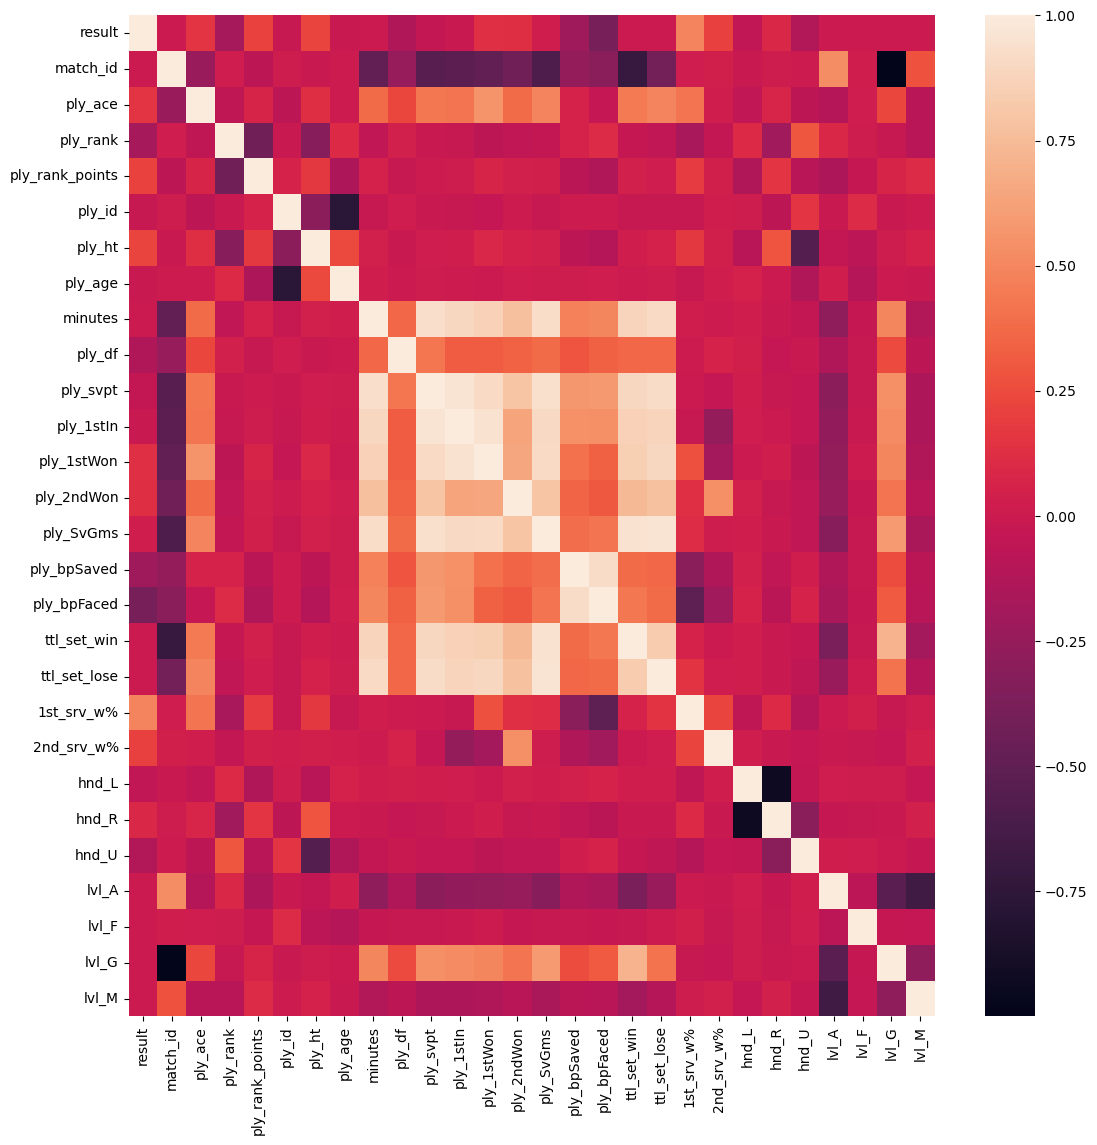

In [360]:
import seaborn as sns 
mt.figure(figsize=(13,13))
corr_mat = encoded_ply_stats.corr(numeric_only=False)
sns.heatmap(corr_mat )

#need to create a column that determines who has won r lost the match that is the predicting feature

In [361]:
#Tie Breaker Analysis

<Axes: >

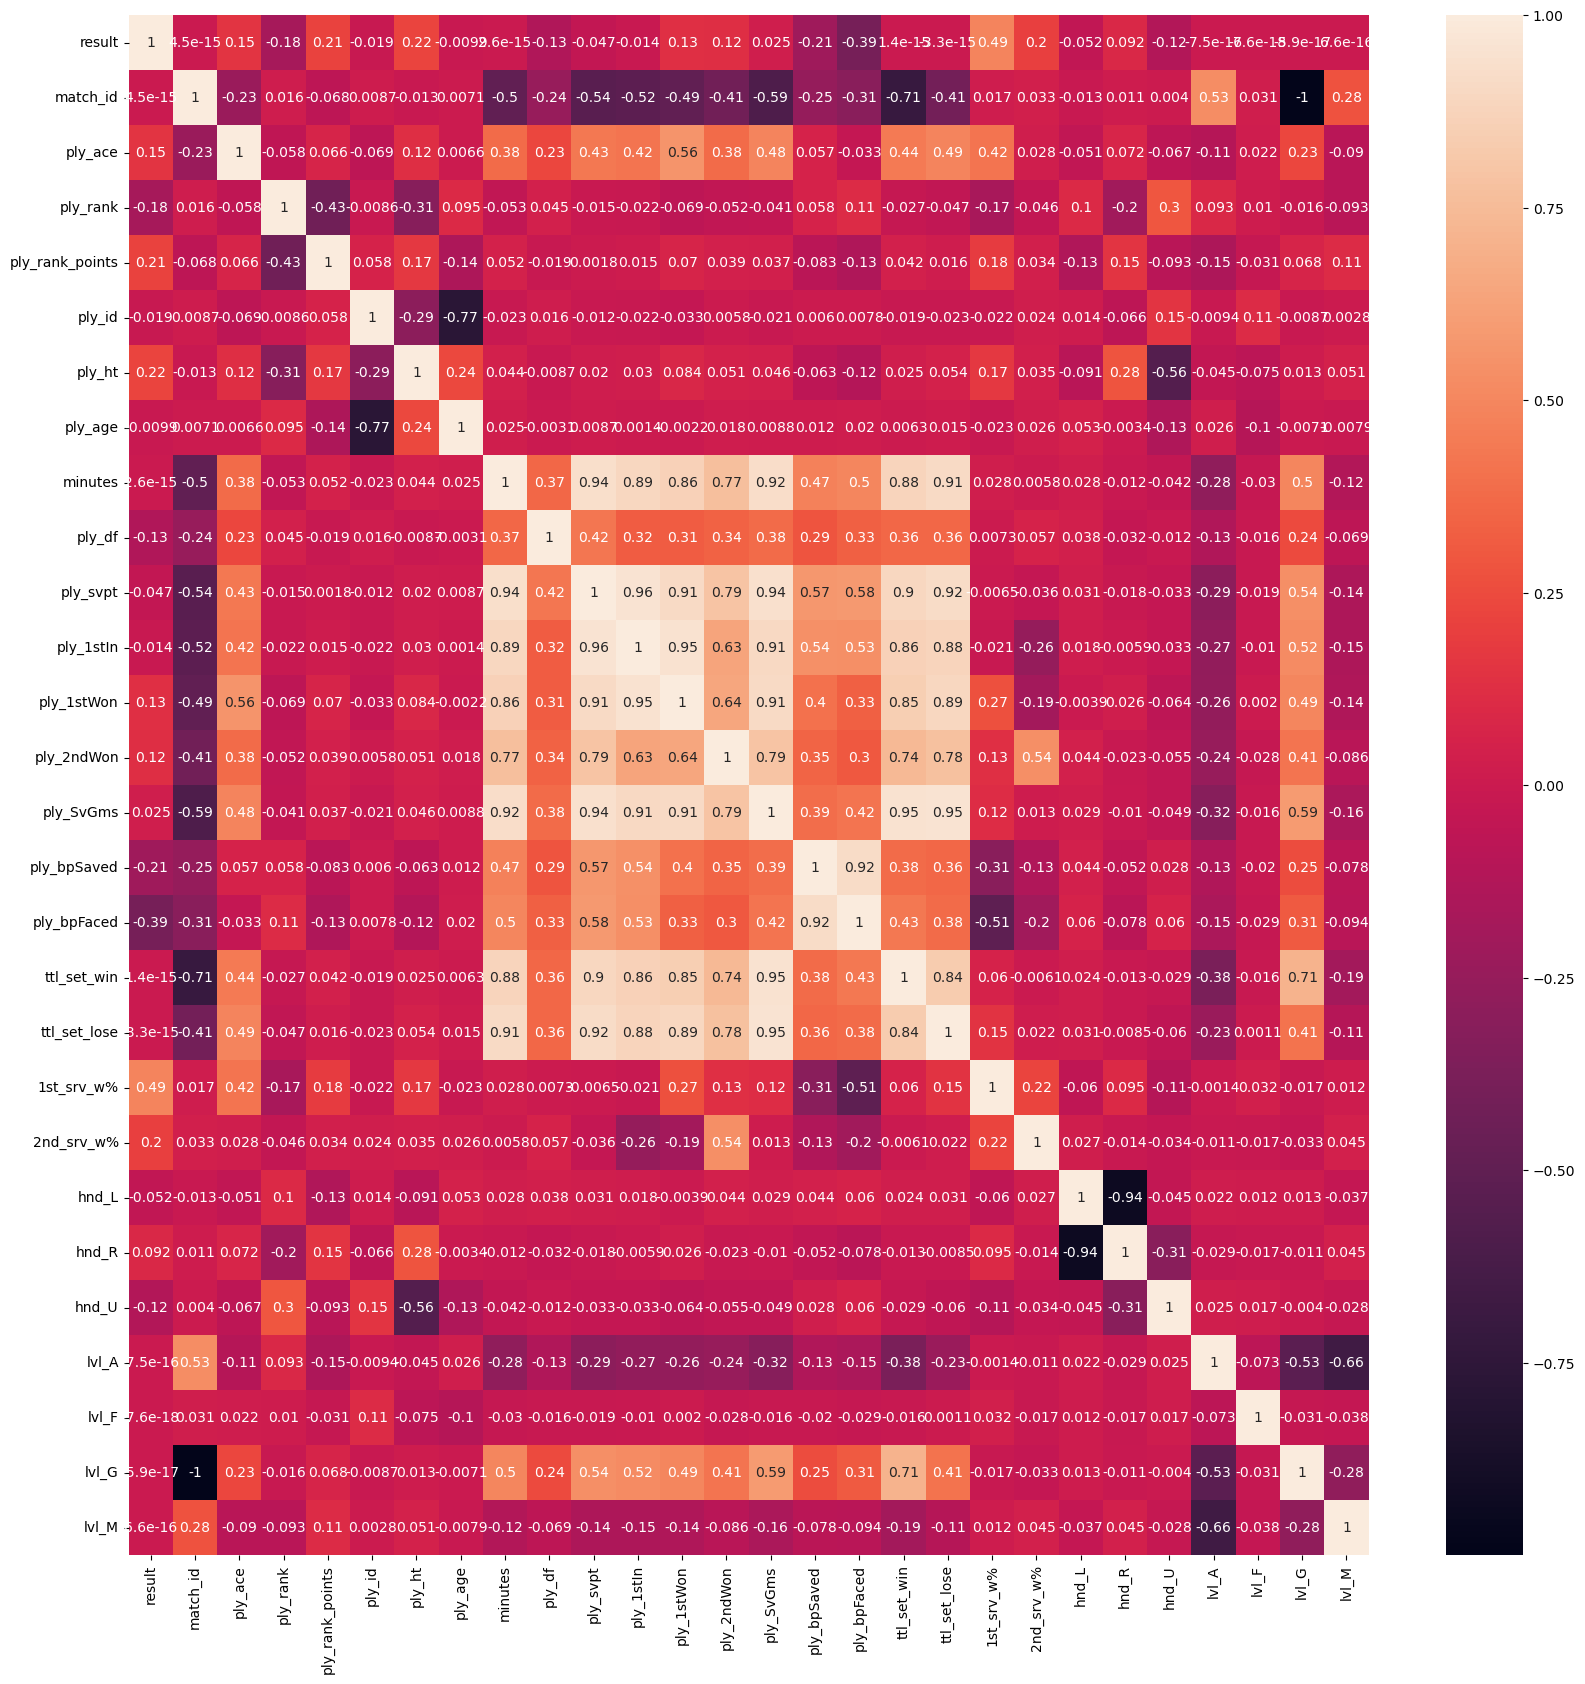

In [362]:
#feature importance using Correlation coefficient
cor = encoded_ply_stats.corr()
mt.figure(figsize = (20,20))
sns.heatmap(cor, annot = True)

In [363]:
w_aces = winner_stats['ace%']
l_ace = loser_stats['ace%']
w_srv_eff = winner_stats['serve_efficiency%']
l_srv_eff = loser_stats['serve_efficiency%']
fig = gg.Figure()
fig.add_trace(gg.Box(x= w_aces , name = "winner ace points distribution"))
fig.add_trace(gg.Box(x = l_ace , name = "loser ace points distribution"))
fig.add_trace(gg.Box(x= w_srv_eff , name = "winner serve efficiency"))
fig.add_trace(gg.Box(x = l_srv_eff , name = "loser serve efficiency"))
fig.show()

In [364]:
w_1srv = winner_stats['1st_srv_w%']
l_1srv = loser_stats['1st_srv_w%']
w_2srv = winner_stats['2nd_srv_w%']
l_2srv = loser_stats['2nd_srv_w%']
wbp = winner_stats['bp_saved%']
l_bp = loser_stats['bp_saved%']
df_winner = winner_stats['ply_df']
df_loser = loser_stats['ply_df']
fig = gg.Figure()
fig.add_trace(gg.Box(x= w_1srv , name = "winner 1st serve won points distribution"))
fig.add_trace(gg.Box(x = l_1srv , name = "loser 1st serve points won distribution"))
fig.add_trace(gg.Box(x= w_2srv , name = "winner 2nd serve won points distribution"))
fig.add_trace(gg.Box(x = l_2srv , name = "loser 2nd serve points won distribution"))
fig.add_trace(gg.Box(x= wbp , name = "winner Breakpoints saved% "))
fig.add_trace(gg.Box(x = l_bp , name = "loser Breakpoints saved%"))
fig.update_layout()
fig.show()


## Surface impact Analysis 
#### 1) using ANOVA

In [365]:
ply_stats = ply_stats.fillna(0)

### H0  (Null hypothesis) The mean first serve win rate for winners is the same across all surfaces.
### H1 ( Alternate hypothesis) The mean first serve win rate for winners is the same across all surfaces.


In [366]:
from scipy import stats
## creating gorups according to the surface
clay_grp = ply_stats[ply_stats['surface']== 'Clay']['1st_srv_w%']
hard_grp = ply_stats[ply_stats['surface']== 'Hard']['1st_srv_w%']
grass_grp = ply_stats[ply_stats['surface']== 'Grass']['1st_srv_w%']

# ANOVA test
f_value, p_value = stats.f_oneway(clay_grp, hard_grp,grass_grp)
print(f"ANOVA F-value: {f_value}")
print(f"ANOVA p-value: {p_value}")

ANOVA F-value: 60.08155754859394
ANOVA p-value: 1.5966570841286112e-26


### A very low p_value in the above Anova test implies that there is a significant difference between mean 1st serve points won(percentage) across all surfaces, thereby rejecting null hypothesis

### Further deep diving into this let us gather insights using Tukey HSD test

In [367]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=ply_stats[['1st_srv_w%']], groups=ply_stats['surface'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Clay  Grass   2.0299    0.0  1.5101  2.5497   True
  Clay   Hard   1.3397    0.0   1.002  1.6774   True
 Grass   Hard  -0.6902 0.0026 -1.1777 -0.2028   True
----------------------------------------------------


### from above table we can get that the mean difference between clay and grass is highest & between Grass and Hard is lowest , hence transitioning form Clay to grass is found to be much more challenging in terms of scoring 1st serve points

### H0  (Null hypothesis) The mean ace win rate for winners is the same across all surfaces.
### H1 ( Alternate hypothesis) The mean acee win rate for winners is the same across all surfaces.


In [368]:
clay_grp_ace = ply_stats[ply_stats['surface']== 'Clay']['ace%']
hard_grp_ace = ply_stats[ply_stats['surface']== 'Hard']['ace%']
grass_grp_ace = ply_stats[ply_stats['surface']== 'Grass']['ace%']

# ANOVA test
f_ace_value, p_ace_value = stats.f_oneway(clay_grp_ace, hard_grp_ace ,grass_grp_ace)
print(f"ANOVA F-value: {f_ace_value}")
print(f"ANOVA p-value: {p_ace_value}")

ANOVA F-value: 256.29623109983544
ANOVA p-value: 6.792823460013864e-107


In [369]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=ply_stats[['ace%']], groups=ply_stats['surface'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Clay  Grass   5.1232    0.0  4.4025  5.8439   True
  Clay   Hard   4.1706    0.0  3.7024  4.6388   True
 Grass   Hard  -0.9526 0.0028 -1.6284 -0.2767   True
----------------------------------------------------


### Similar insights could be gathered for Ace points won, denoting Clay surface to be the favourite amound players as on this surface they score most ace points , as compared to Hard and Clay.

### Mixed Effects Models


In [370]:
ply_stats.columns

Index(['match_id', 'surface', 'tourney_level', 'ply_rank', 'ply_id',
       'ply_hand', 'ply_ht', 'ply_age', 'score', 'set1', 'set2', 'set3',
       'set4', 'set5', 'minutes', 'ply_ace', 'ply_df', 'ply_svpt', 'ply_1stIn',
       'ply_1stWon', 'ply_2ndWon', 'ply_SvGms', 'ply_bpSaved', 'ply_bpFaced',
       'ply_rank_points', 'ttl_set_win', 'ttl_set_lose', 'result',
       'set1_ot_diff', 'set2_ot_diff', 'set3_ot_diff', 'set4_ot_diff',
       'set5_ot_diff', 'set1_pnt_diff', 'set2_pnt_diff', 'set3_pnt_diff',
       'set4_pnt_diff', 'set5_pnt_diff', '1st_srv_w%', '2nd_srv_w%',
       'bp_saved%', 'ace%', 'serve_efficiency%'],
      dtype='object')

In [371]:
import statsmodels.formula.api as smf


# Fit a mixed effects model
model = smf.mixedlm("Q('1st_srv_w%') ~ surface", ply_stats, groups=ply_stats["ply_id"])
result = model.fit()

print(result.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('1st_srv_w%')
No. Observations: 5214    Method:             REML           
No. Groups:       313     Scale:              20.0548        
Min. group size:  1       Log-Likelihood:     -15336.0272    
Max. group size:  84      Converged:          Yes            
Mean group size:  16.7                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         39.991    0.162 246.767 0.000 39.674 40.309
surface[T.Grass]   1.779    0.221   8.052 0.000  1.346  2.212
surface[T.Hard]    1.093    0.147   7.459 0.000  0.806  1.380
Group Var          2.119    0.078                            



### Analysiing momentum shifts using Hidden Markov Model using breakpoints and overtime set point difference

In [381]:
ply_stats.columns

Index(['match_id', 'surface', 'tourney_level', 'ply_rank', 'ply_id',
       'ply_hand', 'ply_ht', 'ply_age', 'score', 'set1', 'set2', 'set3',
       'set4', 'set5', 'minutes', 'ply_ace', 'ply_df', 'ply_svpt', 'ply_1stIn',
       'ply_1stWon', 'ply_2ndWon', 'ply_SvGms', 'ply_bpSaved', 'ply_bpFaced',
       'ply_rank_points', 'ttl_set_win', 'ttl_set_lose', 'result',
       'set1_ot_diff', 'set2_ot_diff', 'set3_ot_diff', 'set4_ot_diff',
       'set5_ot_diff', 'set1_pnt_diff', 'set2_pnt_diff', 'set3_pnt_diff',
       'set4_pnt_diff', 'set5_pnt_diff', '1st_srv_w%', '2nd_srv_w%',
       'bp_saved%', 'ace%', 'serve_efficiency%'],
      dtype='object')

In [382]:
hmm_df = ply_stats[['match_id','ply_id','result','bp_saved%','set1_ot_diff','score', 'set2_ot_diff', 'set3_ot_diff', 'set4_ot_diff','set5_ot_diff','set1_pnt_diff', 'set2_pnt_diff', 'set3_pnt_diff','set4_pnt_diff', 'set5_pnt_diff','ace%','serve_efficiency%']]
hmm_df['overtime_set_point_diff'] = hmm_df[['set1_ot_diff', 'set2_ot_diff', 'set3_ot_diff', 'set4_ot_diff', 'set5_ot_diff']].values.tolist()
hmm_df['set_point_diff'] = hmm_df[['set1_pnt_diff', 'set2_pnt_diff', 'set3_pnt_diff','set4_pnt_diff', 'set5_pnt_diff']].values.tolist()
hmm_df

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\557241383.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrey\AppData\Local\Temp\ipykernel_46960\557241383.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,match_id,ply_id,result,bp_saved%,set1_ot_diff,score,set2_ot_diff,set3_ot_diff,set4_ot_diff,set5_ot_diff,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set4_pnt_diff,set5_pnt_diff,ace%,serve_efficiency%,overtime_set_point_diff,set_point_diff
0,2023-9900300,126203,1,0.000000,3.0,7-6(4) 7-6(6),4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,22.388060,15.294118,"[3.0, 4.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 0.0, 0.0, 0.0]"
1,2023-9900299,126207,1,50.000000,0.0,6-2 0-0 RET,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,13.636364,7.407407,"[0.0, 0.0, 0.0, 0.0, 0.0]","[4.0, 0.0, 0.0, 0.0, 0.0]"
2,2023-9900296,126203,1,50.000000,2.0,7-6(5) 7-6(5),2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,18.032787,13.750000,"[2.0, 2.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 0.0, 0.0, 0.0]"
3,2023-9900295,126207,1,50.000000,0.0,6-3 6-3,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,11.904762,1.639344,"[0.0, 0.0, 0.0, 0.0, 0.0]","[3.0, 3.0, 0.0, 0.0, 0.0]"
4,2023-9900292,126774,1,33.333333,0.0,4-6 7-6(2) 6-4,5.0,0.0,0.0,0.0,-2.0,1.0,2.0,0.0,0.0,14.754098,8.163265,"[0.0, 5.0, 0.0, 0.0, 0.0]","[-2.0, 1.0, 2.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,2023-7696293,208134,0,25.000000,0.0,4-1 4-1 4-2,0.0,0.0,0.0,0.0,-3.0,-3.0,-2.0,0.0,0.0,2.777778,-4.166667,"[0.0, 0.0, 0.0, 0.0, 0.0]","[-3.0, -3.0, -2.0, 0.0, 0.0]"
5210,2023-7696292,207925,0,37.500000,3.0,3-4(4) 4-2 4-3(1) 1-4 4-3(3),0.0,6.0,0.0,4.0,1.0,-2.0,-1.0,3.0,-1.0,5.454545,1.030928,"[3.0, 0.0, 6.0, 0.0, 4.0]","[1.0, -2.0, -1.0, 3.0, -1.0]"
5211,2023-7696290,209414,0,45.000000,0.0,4-2 2-4 4-3(7) 4-1,0.0,3.0,0.0,0.0,-2.0,2.0,-1.0,-3.0,0.0,8.510638,1.428571,"[0.0, 0.0, 3.0, 0.0, 0.0]","[-2.0, 2.0, -1.0, -3.0, 0.0]"
5212,2023-7696288,210506,0,45.000000,0.0,4-2 4-3(3) 3-4(3) 3-4(5) 4-3(4),-4.0,-4.0,-2.0,3.0,-2.0,-1.0,1.0,1.0,-1.0,13.000000,8.035714,"[0.0, -4.0, -4.0, -2.0, 3.0]","[-2.0, -1.0, 1.0, 1.0, -1.0]"


In [383]:
hmm_df = hmm_df.explode(['overtime_set_point_diff','set_point_diff'])

In [384]:
from hmmlearn import hmm
hmm_features = hmm_df[['ace%','bp_saved%','serve_efficiency%','set_point_diff','overtime_set_point_diff']].values
hmm_model = hmm.GaussianHMM(n_components = 3, covariance_type = 'diag', n_iter =1000)
hmm_model.fit(hmm_features)
hidden_stats_hmm = hmm_model.predict(hmm_features)
hmm_df['hidden_markov_states'] = hidden_stats_hmm
hmm_df

,match_id,ply_id,result,bp_saved%,set1_ot_diff,score,set2_ot_diff,set3_ot_diff,set4_ot_diff,set5_ot_diff,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set4_pnt_diff,set5_pnt_diff,ace%,serve_efficiency%,overtime_set_point_diff,set_point_diff,hidden_markov_states
0,2023-9900300,126203,1,0.0,3.0,7-6(4) 7-6(6),4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,22.388060,15.294118,3.0,1.0,1
0,2023-9900300,126203,1,0.0,3.0,7-6(4) 7-6(6),4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,22.388060,15.294118,4.0,1.0,1
0,2023-9900300,126203,1,0.0,3.0,7-6(4) 7-6(6),4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,22.388060,15.294118,0.0,0.0,0
0,2023-9900300,126203,1,0.0,3.0,7-6(4) 7-6(6),4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,22.388060,15.294118,0.0,0.0,0
0,2023-9900300,126203,1,0.0,3.0,7-6(4) 7-6(6),4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,22.388060,15.294118,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,2023-7696286,209406,0,0.0,4.0,3-4(6) 4-2 4-3(5) 4-2,0.0,2.0,0.0,0.0,1.0,-2.0,-1.0,-2.0,0.0,15.254237,9.210526,4.0,1.0,1
5213,2023-7696286,209406,0,0.0,4.0,3-4(6) 4-2 4-3(5) 4-2,0.0,2.0,0.0,0.0,1.0,-2.0,-1.0,-2.0,0.0,15.254237,9.210526,0.0,-2.0,0
5213,2023-7696286,209406,0,0.0,4.0,3-4(6) 4-2 4-3(5) 4-2,0.0,2.0,0.0,0.0,1.0,-2.0,-1.0,-2.0,0.0,15.254237,9.210526,2.0,-1.0,1
5213,2023-7696286,209406,0,0.0,4.0,3-4(6) 4-2 4-3(5) 4-2,0.0,2.0,0.0,0.0,1.0,-2.0,-1.0,-2.0,0.0,15.254237,9.210526,0.0,-2.0,0


In [385]:
hmm_df =hmm_df.drop(columns=['set_point_diff','overtime_set_point_diff'])
hmm_df.drop_duplicates(inplace=True)

In [386]:
hmm_df.columns

Index(['match_id', 'ply_id', 'result', 'bp_saved%', 'set1_ot_diff', 'score',
       'set2_ot_diff', 'set3_ot_diff', 'set4_ot_diff', 'set5_ot_diff',
       'set1_pnt_diff', 'set2_pnt_diff', 'set3_pnt_diff', 'set4_pnt_diff',
       'set5_pnt_diff', 'ace%', 'serve_efficiency%', 'hidden_markov_states'],
      dtype='object')

In [387]:
imploded_hmm_df = hmm_df.groupby(['match_id','ply_id', 'result', 'bp_saved%', 'set1_ot_diff', 'score', 'set2_ot_diff',
       'set3_ot_diff', 'set4_ot_diff', 'set5_ot_diff', 'set1_pnt_diff',
       'set2_pnt_diff', 'set3_pnt_diff', 'set4_pnt_diff', 'set5_pnt_diff',
       'ace%','serve_efficiency%']).agg(lambda x: list(x)).reset_index()

In [388]:
imploded_hmm_df

,match_id,ply_id,result,bp_saved%,set1_ot_diff,score,set2_ot_diff,set3_ot_diff,set4_ot_diff,set5_ot_diff,set1_pnt_diff,set2_pnt_diff,set3_pnt_diff,set4_pnt_diff,set5_pnt_diff,ace%,serve_efficiency%,hidden_markov_states
0,2023-0301271,106329,0,42.857143,0.0,6-3 7-5,0.0,0.0,0.0,0.0,-3.0,-2.0,0.0,0.0,0.0,15.217391,10.769231,[0]
1,2023-0301271,208103,1,50.000000,0.0,6-3 7-5,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,12.500000,6.896552,[0]
2,2023-0301272,105948,0,33.333333,2.0,6-7(5) 6-4 7-5,0.0,0.0,0.0,0.0,1.0,-2.0,-2.0,0.0,0.0,4.166667,-0.869565,"[1, 2]"
3,2023-0301272,106218,1,33.333333,-2.0,6-7(5) 6-4 7-5,0.0,0.0,0.0,0.0,-1.0,2.0,2.0,0.0,0.0,3.370787,1.652893,"[1, 2]"
4,2023-0301273,105173,0,38.461538,0.0,6-4 7-6(4),-3.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,0.0,14.583333,7.042254,"[2, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,2023-9900296,128034,0,50.000000,-2.0,7-6(5) 7-6(5),-2.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,21.518987,19.512195,"[1, 0]"
5210,2023-9900299,126207,1,50.000000,0.0,6-2 0-0 RET,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,13.636364,7.407407,[0]
5211,2023-9900299,207518,0,25.000000,0.0,6-2 0-0 RET,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.000000,0.000000,[2]
5212,2023-9900300,126203,1,0.000000,3.0,7-6(4) 7-6(6),4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,22.388060,15.294118,"[1, 0]"


####  Hidden Markov States are : State 0 -> Strong or peak performance :
####  State 1 -> Stable or consistent performance :
####  state 3 -> weak performance or struggling at certain aspect :
####  Example for match_id : 2023-0308271 here are the inference based on Hidden Malkov states
#####  1. Winner(Player 104755) hidden states are [1,0] and loser(Player 105311) hidden states are [1,2]
#####  2. both have state 1 , indicating neutral or stable momentum , the Break point saved% for both players is considerably healthy 
#####  3. State 0 for winner is due to better Ace% [16.67%] over loser Ace%[2.33%] thus loser transitionjing into state 2 at certain satges in the Match
#####  4. The winner (Player 104755) showed consistent and strong performance, particularly in saving break points and critical set points.
#####  5. The loser (Player 105311) struggled with saving break points and had a lower ace percentage, contributing to their loss.